In [28]:
csv_path = 'attention_scores.csv'

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmaps(df, layer_numbers, head_numbers):
    # Initialize an empty dataframe to store the average logits
    # Initialize an empty list to store the average logits
    avg_data = []

    # Group the data by 'layer_number' and 'head_number'
    grouped = df.groupby(['layer_number', 'head_number'])

    # For each group
    for name, group in grouped:
        # Initialize an empty array to store the logits
        logits = []

        # For each row in the group
        for _, row in group.iterrows():
            # Convert the 'logits' string into a numpy array
            logit = np.array([float(x) if x != 'inf' else np.inf for x in row['logits'].split(',')])

            # Append the logits to the list
            logits.append(logit)

        # Calculate the average logits
        avg_logits = np.nanmean(logits, axis=0)

        # Append the average logits to the list
        avg_data.append({'layer_number': name[0], 'head_number': name[1], 'avg_logits': avg_logits})

    # Convert the list into a DataFrame
    avg_df = pd.DataFrame(avg_data)

    # For each layer number and head number
    for layer_number, head_number in zip(layer_numbers, head_numbers):
        # Select the row with the specified layer number and head number
        row = avg_df[(avg_df['layer_number'] == layer_number) & (avg_df['head_number'] == head_number)].iloc[0]
        
        # Get the average logits
        avg_logits = row['avg_logits']
        
        # Create a new figure
        plt.figure()
        
        # Create a colormap that uses grey for inf values, red for high values, and blue for low values
        cmap = plt.cm.colors.LinearSegmentedColormap.from_list("", ["blue","red"])
        

        avg_logits = avg_logits.reshape((16, 16))

        # Plot the heatmap
        plt.imshow(avg_logits, cmap=cmap)
        
        # Add a colorbar
        plt.colorbar()
        
        # Set the title
        plt.title(f'Layer {layer_number}, Head {head_number}')
        
        # Show the plot
        plt.show()



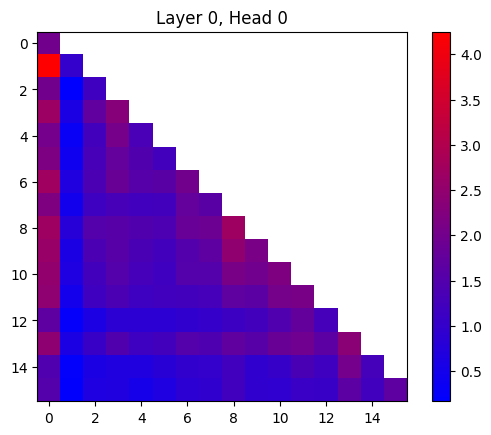

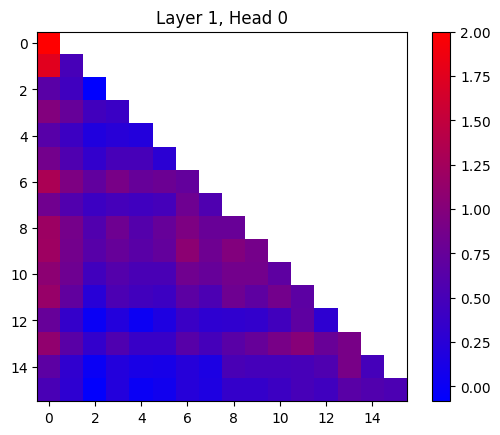

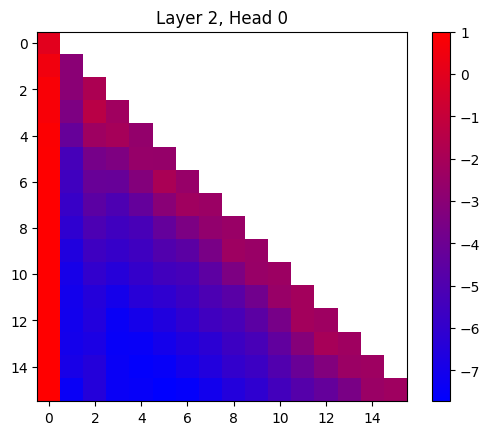

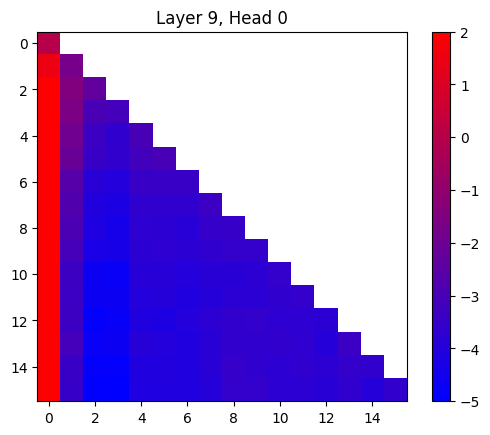

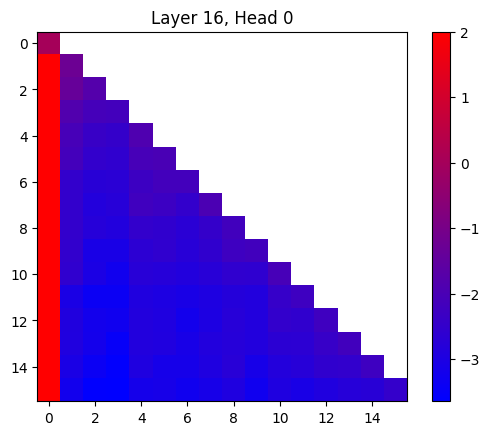

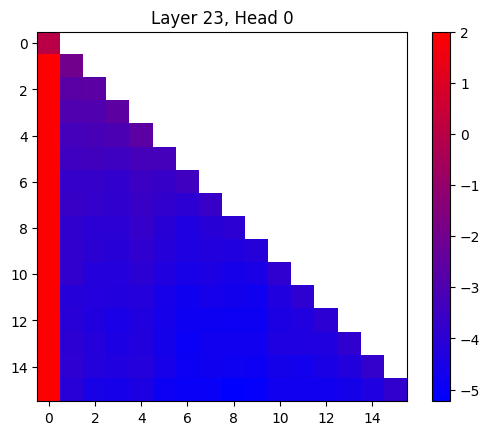

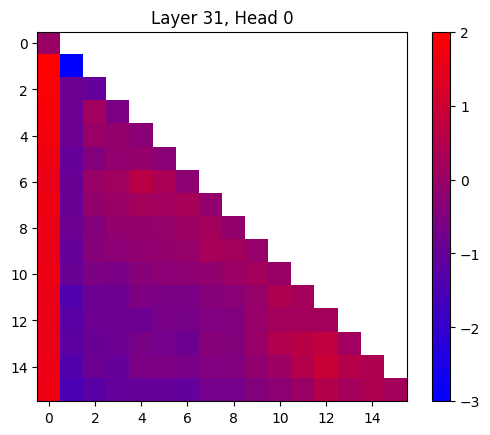

In [30]:
df = pd.read_csv(csv_path)
plot_heatmaps(df, [0, 1, 2, 9, 16, 23, 31], [0, 0, 0, 0, 0, 0, 0])